<IPython.core.display.Javascript object>


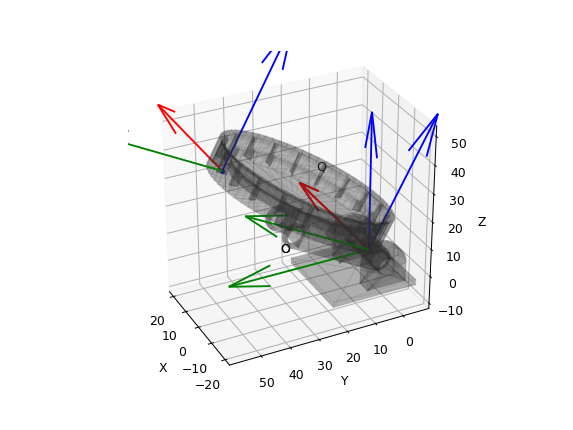

In [5]:
from sympy.physics.mechanics import ReferenceFrame,Point,dynamicsymbols
from sympy.physics.mechanics import Point
from sympy import latex,pprint,symbols,init_printing
from sympy.algebras.quaternion import Quaternion
import numpy as np
import sys 
sys.path.append("../tools")
from vis import Visualizer
%matplotlib notebook
init_printing() # Para visualizar simbolos
# Definicion del modelo para el ejemplo de atraccion de parque de diversiones
a=ReferenceFrame('A')
#Defina el punto O
o=Point('O')
# Parametros del modelo
l,r,h=symbols('L,R,h')
# Variables de movimiento
q1,q2=dynamicsymbols('q1,q2')
# Marco de referencia B
b=a.orientnew('B','Axis',(q1,a.x))
p=o.locatenew('P',l*b.y)
# Marco de referencia C
c=b.orientnew('C','Axis',(q2,b.z))
q=p.locatenew('Q',r*c.y+h*c.z)
# Visualizacion (Incluyendo superficies en stl)

# Construya un objecto de visualizacion con el marco de referencia inercial y punto de origen
vis=Visualizer(a,o)
# Agrege marcos y puntos para ser visualizados (marco,punto,geometria)
vis.add(a,o,shape='assets/Atraccion_Parque_base.stl')
vis.add(b,o,shape='assets/Atraccion_Parque_link1.stl')
vis.add(c,p,shape='assets/Atraccion_Parque_disk.stl')
vis.add(a,o,frame_scale=50)
vis.add(b,o,frame_scale=50)
vis.add(c,q,frame_scale=50)

# Modifique las variables de movimiento y verifique el cambio en la posicion y
# orientacion de los marcos
vis.plot({l:35,r:30,h:12,q1:0.5,q2:0})

In [3]:
#Modifique las variables de movimiento para cambiar la configuracion cinematica del modelo
#Puede hacerlo desde esta celda para actualizar el modelo sin tener que volver a generar la figura.
vis.plot({l:35,r:30,h:12,q1:0.5,q2:1.2})

In [4]:
#Esto permite crear animaciones facilmente
#Ejecute esta celda y de click en la figura 1 para observar la animacion del movimiento.
import matplotlib
from matplotlib.animation import FuncAnimation
tt=np.linspace(0,10,500)
qq1=np.sin(2*np.pi*0.1*tt)
qq2=np.linspace(0,np.pi*2*10,len(tt))

def animfunc(i,qq1,qq2):
    vis.plot({l:35,r:30,h:12,q1:qq1[i],q2:qq2[i]})  

FuncAnimation(vis.fig,animfunc,fargs=(qq1,qq2),interval=20)